# Modern Football: From perspective of data Science

### Imports and initial configuration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go



from subprocess import check_output


## Data Preparation
Preparing data to be used in this notebook. Loading and merging datasets, changing columns values and mapping encoded values to real values presented in the dictionary. 

### Loading datasets

In [7]:
## Loading events dataset
df_events = pd.read_csv("F:\\CSV files\\football-events\\events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf = pd.read_csv("F:\\CSV files\\football-events\\ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]
df_ginf.head(10)


,id_odsp,date,league,season,country
0,UFot0hit/,2011-08-05,D1,2012,germany
1,Aw5DflLH/,2011-08-06,D1,2012,germany
2,bkjpaC6n/,2011-08-06,D1,2012,germany
3,CzPV312a/,2011-08-06,F1,2012,france
4,GUOdmtII/,2011-08-06,F1,2012,france
5,lOpzwMkp/,2011-08-06,D1,2012,germany
6,M7PhlM2C/,2011-08-06,F1,2012,france
7,QuWqjrYa/,2011-08-06,F1,2012,france
8,UBZQ4smg/,2011-08-06,F1,2012,france
9,Wn69eU5B/,2011-08-06,D1,2012,germany


### Preparing data

In [8]:
df_events.head(10)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


In [9]:
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events = df_events.merge(df_ginf, how='left')

In [10]:
## Filtering the seasons because some leagues have many more matches than others before season 2015
df_events = df_events[df_events['season'] >= 2015]

In [11]:
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}

In [12]:
## Apply the mapping
df_events['league'] = df_events['league'].map(leagues)

### Reading dictionary to use in the charts/code

In [16]:
## Events type 1
event_type_1 = pd.Series([
    'Announcement',
    'Attempt',
    'Corner',
    'Foul',
    'Yellow card',
    'Second yellow card',
    'Red card',
    'Substitution',
    'Free kick won',
    'Offside',
    'Hand ball',
    'Penalty conceded'], index=[[item for item in range(0, 12)]])

## Events type 2
event_type2 = pd.Series(['Key Pass', 'Failed through ball', 'Sending off', 'Own goal'],
                       index=[[item for item in range(12, 16)]])

## Match side
side = pd.Series(['Home', 'Away'], index=[[item for item in range(1, 3)]])

## Shot place
shot_place = pd.Series([
    'Bit too high', 
    'Blocked',
    'Bottom left corner',
    'Bottom right corner',
    'Centre of the goal',
    'High and wide',
    'Hits the bar',
    'Misses to the left',
    'Misses to the right',
    'Too high',
    'Top centre of the goal',
    'Top left corner',
    'Top right corner'
], index=[[item for item in range(1, 14)]])

## Outcome of shot
shot_outcome = pd.Series(['On target', 'Off target', 'Blocked', 'Hit the bar'],
                        index=[[item for item in range(1, 5)]])
## Location of shot
location = pd.Series([
    'Attacking half',
    'Defensive half',
    'Centre of the box',
    'Left wing',
    'Right wing',
    'Difficult angle and long range',
    'Difficult angle on the left',
    'Difficult angle on the right',
    'Left side of the box',
    'Left side of the six yard box',
    'Right side of the box',
    'Right side of the six yard box',
    'Very close range',
    'Penalty spot',
    'Outside the box',
    'Long range',
    'More than 35 yards',
    'More than 40 yards',
    'Not recorded'
], 
index=[[item for item in range(1, 20)]])

## Players' body part
bodypart = pd.Series(['right foot', 'left foot', 'head'], index=[[item for item in range(1, 4)]])
print(bodypart.head(10))

## Assist method
assist_method = pd.Series(['None', 'Pass', 'Cross', 'Headed pass', 'Through ball'],
                         index=[item for item in range(0, 5)])

## Situation
situation = pd.Series(['Open play', 'Set piece', 'Corner', 'Free kick'],
                     index=[item for item in range(1, 5)])
situation.head(10)

1    right foot
2     left foot
3          head
dtype: object


1    Open play
2    Set piece
3       Corner
4    Free kick
dtype: object

## Football Exploratory Data Analysis

### Utility function to create barplots
We create barplots using matplotlib several times in this notebook. To reuse code to execute similar tasks, we're using this generic function to create a barplot with its parameters.

In [21]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()
    

### Event types breakdown
The occurence of the event types.

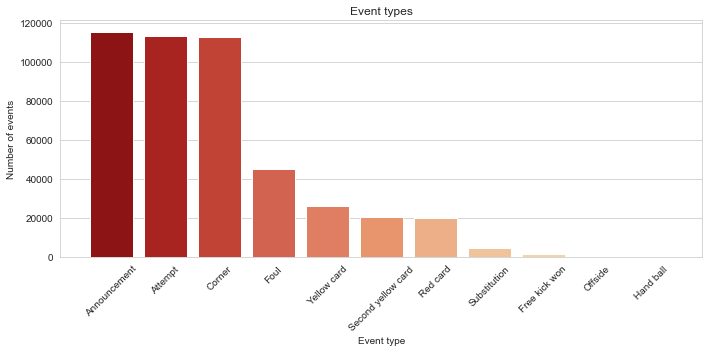

In [22]:
## Count of events occurecies
events_series = df_events['event_type'].value_counts()

## Plotting chart 
plot_barplot(events_series, event_type_1.values,
            "Event type", "Number of events", "Event types", 'OrRd_r', 10, 5)

We can see above that the three most commom events are: Announcement, Attempt, and Corner. 

### What are the most offensive player and teams?
What are the most offensive teams in all leagues?

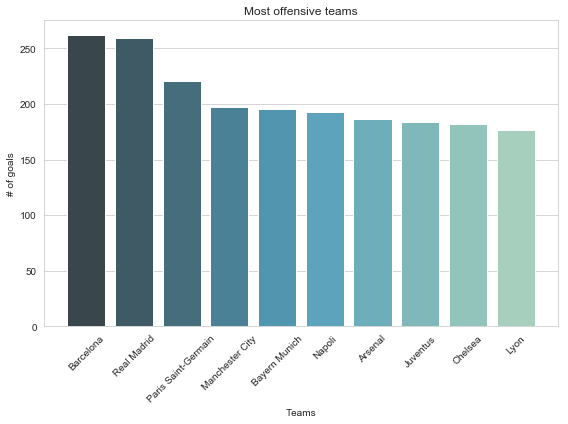

In [26]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', '# of goals', 'Most offensive teams', 'GnBu_d', 8, 6)


It's really interesting that the leagues considered to be very competitive have the most teams on the top 10: Premier League (England) and Serie A (Italy) with 3 teams each. However, the UEFA coefficient (https://www.uefa.com/memberassociations/uefarankings/country/) considers 'La Liga' as the top league.

### Breaking down by player
What are the most offensive players in all leagues?

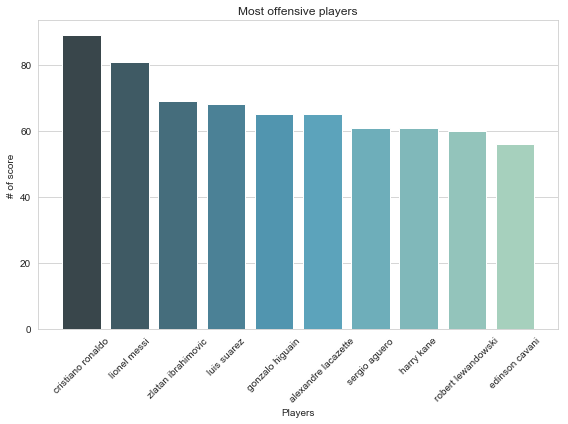

In [27]:
## grouping by player when is goal
grouping_by_offensive_player = df_events[df_events['is_goal']==1].groupby('player')

## Couting and sorting the number of goals by player, then pick the top 10
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:10]
## Extracting player names
players = grouping_by_offensive_player.index
## Extracting values (# of goals)
scores = grouping_by_offensive_player['id_event']

## Plotting the chart
plot_barplot(scores, players, 'Players', '# of score', 'Most offensive players', 'GnBu_d', 8, 6)

Zlatan Ibrahimovic(*) and Pierre-emerick Aubameyang are the only players that do not play for the top 10 most offensive teams.

(*) He played for Paris Saint-German until season 2016, then transfered to Manchester United, which does not appear on the most offensive teams list

Barcelona is the only team which has 2 players as the most offensives if we take into account that Zlatan Ibrahimovic played for PSG and Manchester United in this interval.

### Most effective players
This metric evaluates how much effective a players is, which means that the most effective player needs **the least number of attempts** to score a goal, and the less effective player needs **the most number of chances** to score a single goal.

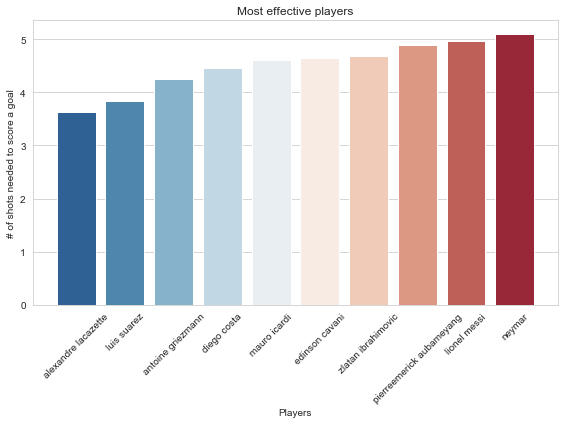

In [28]:
## Grouping by player when attempt == 1
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('player').count()

## Grouping by player when is goal and attempt == 1
grouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('player').count()

## Grouping by player when is not goal and attempt == 1
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('player').count()

## Setting a threshold to filter out players with a small number of attempts, which can lead to a lack 
## of consistency in the final result
threshold = grouped_by_player['id_event'].std()

grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('player').count()
## filtering players that have at least more than average number of chances to skip noise
## For example, a player that has 2 attempts and 1 goal has a very high effectiveness, even though,
## this particular player has not created many chances for his team
grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['id_event'] > threshold]

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Players', 
            '# of shots needed to score a goal',
            'Most effective players',
            'RdBu_r', 8, 6)

We can see that Alexandre Lacazette is the most effective player. He scores the most number of goals **proportionately** to the number of attempts he has. 

### Another perspective of the same data

We can see it at a different angle. 

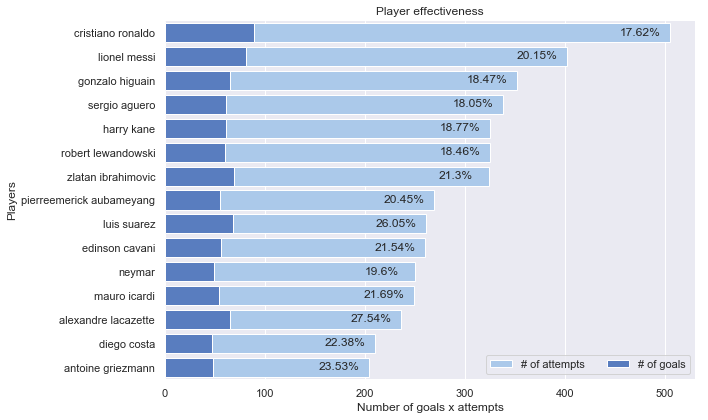

In [29]:
## Creating a dataframe with total of attempts and total goals
result_df = pd.DataFrame({'total': total.dropna(), 'is_goal': grouped_by_player_is_goal_filtered['id_event']})
## Sorting values by total
result_df.sort_values('total', ascending=False, inplace=True)

## Setting style to dark
sns.set(style="darkgrid")

## Creating figure
f, ax = plt.subplots(figsize=(10, 6))

## Plotting chart
sns.set_color_codes("pastel")
sns.barplot(x="total",
            y=result_df.index,
            data=result_df,
            label="# of attempts", color="b")

sns.set_color_codes("muted")
sns.barplot(x='is_goal',
            y=result_df.index, 
            data=result_df,
            label="# of goals", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Players",
       xlabel="Number of goals x attempts", title='Player effectiveness')

each = result_df['is_goal'].values
the_total = result_df['total'].values
x_position = 50

for i in range(len(ax.patches[:15])):
    ax.text(ax.patches[i].get_width() - x_position, ax.patches[i].get_y() +.50, 
            str(round((each[i]/the_total[i])*100, 2))+'%')
    
sns.despine(left=True, bottom=True)
f.tight_layout()

This chart also shows the players effectiveness from different perspective. We can still see that Alexandre Lacazette and Luis Suarez have the most effectiveness, but if we compare to the number of attempts of Cristiano Ronaldo and Lionel Messi, we can easily see why they have been considered the best for many years: **consistency**. It's difficult to imagine that Lacazette and Suarez will keep this performance every season. 
So, for example, if we define a threshold line in Zatlan Ibrahimovic, only him and Lionel Messi (28%) achieve more than 20% effectiveness. On the other hand, bellow this threshold, about 87% of the players achieved more than 20% of effectiveness. 

### Top first & last minute scorers
In this section, we are analysing the teams that scored most goals in the first 15 minutes of the matches, and in the last 15 minutes of the matches.

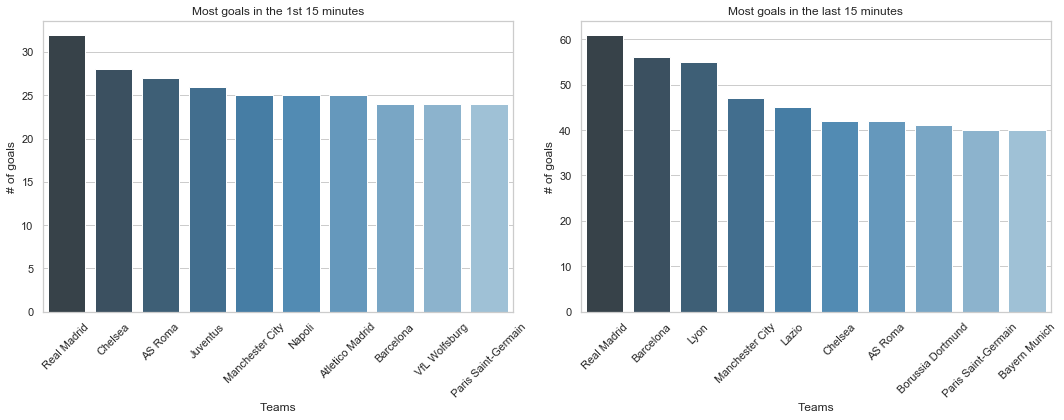

In [30]:
## Filtering out events with time <= 15'
first_15 = df_events[df_events['time'] <= 15]
## Filtering out events with time between 75' and 90'
last_15 = df_events[(df_events['time'] >= 75) & (df_events['time'] <= 90)]

## Grouping by teams for the first 15'
top_10_scorer_first_15 = first_15[first_15['is_goal'] == 1].groupby('event_team').count().sort_values(by='id_event', ascending=False)

## Extracting teams from dataframe
teams = top_10_scorer_first_15.index[:10]
## Extracting number of goals 
scores = top_10_scorer_first_15['id_event'][:10]

## Plotting results
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
ax = sns.barplot(x = [j for j in range(0, len(scores))], y=scores.values, palette='Blues_d', ax=axs[0])
ax.set_xticks([j for j in range(0, len(scores))])
ax.set_xticklabels(teams, rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'Most goals in the 1st 15 minutes');

## Grouping by last 15' scorers
top_10_scorer_last_15 = last_15[last_15['is_goal'] == 1].groupby('event_team').count().sort_values(by='id_event', ascending=False)[:10]

## Extracting the names of the teams
teams_last_15 = top_10_scorer_last_15.index[:10]
## Extracting the number of goals
scores_last_15 = top_10_scorer_last_15['id_event'][:10]

## Plottin the results
ax = sns.barplot(x = [j for j in range(0, len(scores_last_15))], y=scores_last_15.values, palette='Blues_d', ax=axs[1])
ax.set_xticks([j for j in range(0, len(scores_last_15))])
ax.set_xticklabels(teams_last_15, rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'Most goals in the last 15 minutes');
fig.tight_layout()

Real Madrid appeared in both lists: the teams that scored the most goals in the beginning of the match and in the end of the match. 100% focus from the beginning until the end facing this team.

### Last minute goals by player
Breaking down the analysis by player. Which player can be considered the most 'decisive' player?

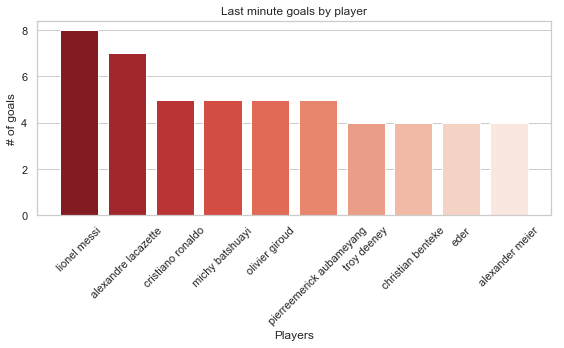

In [31]:
## Last minute goals
last_minute_goals = df_events[(df_events['time'] >= 90) &
                             (df_events['time'] <= 95)]

## Last minute scores by team, league, opponent, and players
top_last_minute_scores = last_minute_goals[last_minute_goals['is_goal'] == 1].groupby(['event_team', 'league']).count().sort_values(by='id_event', ascending=False)
top_last_minute_scored = last_minute_goals[last_minute_goals['is_goal'] == 1].groupby('opponent').count().sort_values(by='id_event', ascending=False)
top_last_minute_scores_by_player = last_minute_goals[last_minute_goals['is_goal'] == 1].groupby('player').count().sort_values(by='id_event', ascending=False)

## Plotting the last minute goals by players
plot_barplot(top_last_minute_scores_by_player['id_event'][:10],
            top_last_minute_scores_by_player.index[:10],
            'Players',
            '# of goals',
            'Last minute goals by player',
            'Reds_r', 8, 5)

5 players on this list play on Premier League. Interesting, isn't it?

### Last minute goals breakdown by league
Which teams have scored the most number of goals by league?

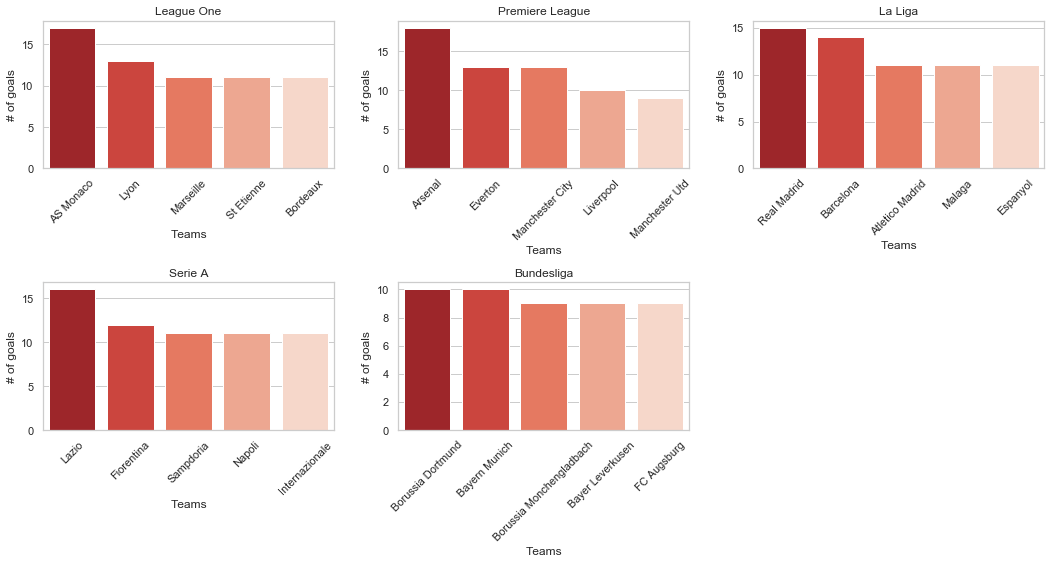

In [32]:
## Reseting index
top_last_minute_scores.reset_index(inplace=True)

## Filtering out dataframe by league
top_5_scorer_league_one = top_last_minute_scores[top_last_minute_scores['league'] == 'League One'][:5]
top_5_scorer_premier_league = top_last_minute_scores[top_last_minute_scores['league'] == 'Premier League'][:5]
top_5_scorer_la_liga = top_last_minute_scores[top_last_minute_scores['league'] == 'La Liga'][:5]
top_5_scorer_serie_a = top_last_minute_scores[top_last_minute_scores['league'] == 'Serie A'][:5]
top_5_scorer_bundesliga = top_last_minute_scores[top_last_minute_scores['league'] == 'Bundesliga'][:5]

## Plotting the chart
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = sns.barplot(x = [j for j in range(0, len(top_5_scorer_league_one['id_event']))],
                 y=top_5_scorer_league_one['id_event'].values,
                 palette='Reds_r', ax=axs[0][0])
ax.set_xticks([j for j in range(0, len(top_5_scorer_league_one['id_event']))])
ax.set_xticklabels(top_5_scorer_league_one['event_team'], rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'League One');

ax = sns.barplot(x = [j for j in range(0, len(top_5_scorer_premier_league['id_event']))],
                 y=top_5_scorer_premier_league['id_event'].values,
                 palette='Reds_r', ax=axs[0][1])
ax.set_xticks([j for j in range(0, len(top_5_scorer_premier_league['id_event']))])
ax.set_xticklabels(top_5_scorer_premier_league['event_team'], rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'Premiere League');

ax = sns.barplot(x = [j for j in range(0, len(top_5_scorer_la_liga['id_event']))],
                 y=top_5_scorer_la_liga['id_event'].values,
                 palette='Reds_r', ax=axs[0][2])
ax.set_xticks([j for j in range(0, len(top_5_scorer_la_liga['id_event']))])
ax.set_xticklabels(top_5_scorer_la_liga['event_team'], rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'La Liga');

ax = sns.barplot(x = [j for j in range(0, len(top_5_scorer_serie_a['id_event']))],
                 y=top_5_scorer_serie_a['id_event'].values,
                 palette='Reds_r', ax=axs[1][0])
ax.set_xticks([j for j in range(0, len(top_5_scorer_serie_a['id_event']))])
ax.set_xticklabels(top_5_scorer_serie_a['event_team'], rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'Serie A');

ax = sns.barplot(x = [j for j in range(0, len(top_5_scorer_bundesliga['id_event']))],
                 y=top_5_scorer_bundesliga['id_event'].values,
                 palette='Reds_r', ax=axs[1][1])
ax.set_xticks([j for j in range(0, len(top_5_scorer_bundesliga['id_event']))])
ax.set_xticklabels(top_5_scorer_bundesliga['event_team'], rotation=45)
ax.set(xlabel = 'Teams', ylabel = '# of goals', title = 'Bundesliga');

axs[1][2].axis('off')

fig.tight_layout()

Monaco, Arsenal, Real Madrid, Lazio, and Borussia Dortmund. Something important to note is that in the most leagues, the main team is not the top last minute scorer. Examples: League One, Serie A, and Bundesliga. I am not taking into account Premiere League because there are many comparable teams. 

* Serie A has the most number of attempts off target.
* Premier league and Serie A have the most number of shots on target.
* Premier league has the most number of shots bocked among all leagues.

### Most accurate and les accurate players
Players whose shots are more likely to go on target (most accurate) and off target (less accurate).

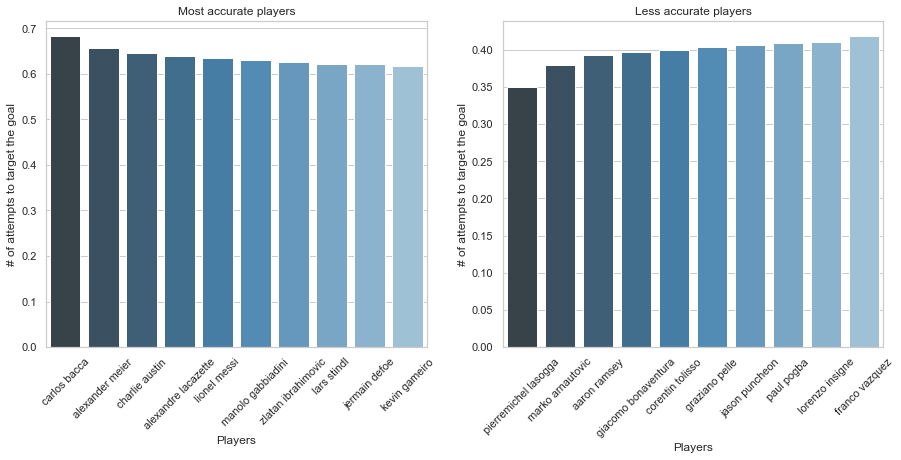

In [34]:
## Total number of attempts on target
total_events = df_events[(df_events['event_type'] == 1) &
         ((df_events['shot_outcome'] == 1) |
         (df_events['shot_outcome'] == 2))].groupby('player').count()
         
## Using the threshold to filter out players with fewer events
total_events = total_events[total_events['id_event'] > threshold]

## How many of those attempt events were actually on target
on_target_events = df_events[(df_events['event_type'] == 1) &
         (df_events['shot_outcome'] == 1)].groupby('player').count()

threshold = 100

## Filtering out the result
total_events = total_events[total_events['id_event'] > threshold]

## Dividing the number of attemps by the attempts on target
on_target = on_target_events['id_event']/total_events[total_events.index.isin(on_target_events.index)]['id_event']

## Sorting the result to find the most 'accurate' players
most_accurate_players = on_target.dropna().sort_values(ascending=False)[:10]
less_accurate_players = on_target.dropna().sort_values()[:10]

sns.set_style("whitegrid")
## Plot the most accurate players chart
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
ax = sns.barplot(x = [j for j in range(0, len(most_accurate_players))], y=most_accurate_players.values, palette='Blues_d', ax=axs[0])
ax.set_xticks([j for j in range(0, len(most_accurate_players))])
ax.set_xticklabels(most_accurate_players.index, rotation=45)
ax.set(xlabel = 'Players', ylabel = '# of attempts to target the goal', title = 'Most accurate players');

## Plot the less accurate players chart
ax = sns.barplot(x = [j for j in range(0, len(less_accurate_players))], y=less_accurate_players.values, palette='Blues_d', ax=axs[1])
ax.set_xticks([j for j in range(0, len(less_accurate_players))])
ax.set_xticklabels(less_accurate_players.index, rotation=45)
ax.set(xlabel = 'Players', ylabel = '# of attempts to target the goal', title = 'Less accurate players');

Above we show the 'more accurate' player and the 'less accurate' one.
* 70% of Carlos Bacca's shots find the goal.
* Lionel Messi shots on target 2 out of 3 times.

### Important notes:
* Lionel Messi and Cristiano Ronaldo are some examples from what has been previously explained. These players are the ones with the most attempts overall, so it's clear why they have also a considerable number of shots blocked.
* Philippe Coutinho is not a player with a huge number of opportunities - compare to Messi and Cristiano Ronaldo - but he is well known for his long range shot abilities. That's why he is on this list: long range shots are more likely to be blocked because you have more players in front of you trying to disarm you.
* Other factors that lead a player to have an attempt blocked must be investigated: wrong decision making, lack of ability, field conditions, oponent performance, etc.


### Most goals from outside the box
This section analyzes the players with the most goals from outside the box, long range shots.

### Body part - Breakdown by player
Which players scored the most goals by body part?

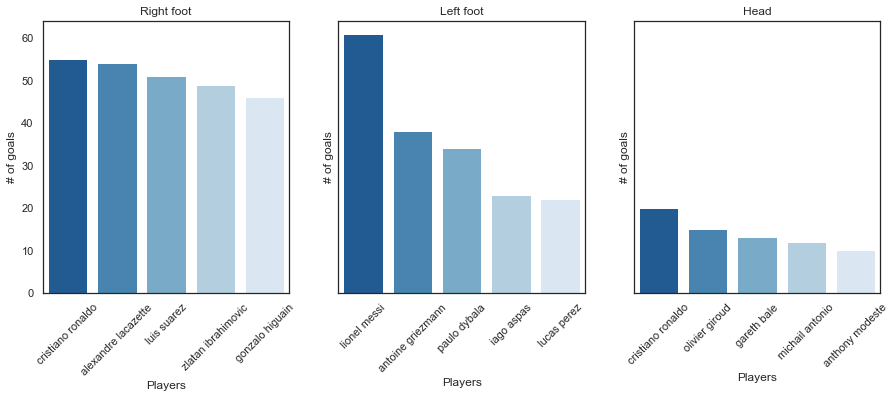

In [41]:
## Copying the original dataset
df_goals = df_events.copy()

## Filtering goals events
df_goals = df_goals[df_goals['is_goal'] == 1]

## Goals with right foot
right_foot = df_goals[df_goals['bodypart'] == 1].groupby('player').count().sort_values('id_event',
                                                                          ascending=False)[:5]

## Goals with left foot
left_foot = df_goals[df_goals['bodypart'] == 2].groupby('player').count().sort_values('id_event',
                                                                           ascending=False)[:5]

## Goals with head
head = df_goals[df_goals['bodypart'] == 3].groupby('player').count().sort_values('id_event',
                                                                           ascending=False)[:5]

## Most goals by bodypart
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
ax = sns.barplot(x = [j for j in range(0, len(right_foot['id_event']))],
                 y=right_foot['id_event'].values, palette='Blues_r', ax=axs[0])
ax.set_xticks([j for j in range(0, len(right_foot['id_event']))])
ax.set_xticklabels(right_foot['event_team'].index, rotation=45)
ax.set(xlabel = 'Players', ylabel = '# of goals', title = 'Right foot');

ax = sns.barplot(x = [j for j in range(0, len(left_foot['id_event']))],
                 y=left_foot['id_event'].values, palette='Blues_r', ax=axs[1])
ax.set_xticks([j for j in range(0, len(left_foot['id_event']))])
ax.set_xticklabels(left_foot['event_team'].index, rotation=45)
ax.set(xlabel = 'Players', ylabel = '# of goals', title = 'Left foot');

ax = sns.barplot(x = [j for j in range(0, len(head['id_event']))],
                 y=head['id_event'].values, palette='Blues_r', ax=axs[2])
ax.set_xticks([j for j in range(0, len(head['id_event']))])
ax.set_xticklabels(head['event_team'].index, rotation=45)
ax.set(xlabel = 'Players', ylabel = '# of goals', title = 'Head');

* Cristiano Ronaldo is the leader right foot and head finisher. The left foot finisher, as you can guess, is Lionel Messi.
* 4 out of 5 players from the left foot list play in La Liga (except for Paulo Dybala), which in part explains why La Liga is leader in left foot scorers among all other european leagues.

#### Showing the same data with a different chart
Here we're using a kind o scatter plot to see the same relationship with a different visual. Also, the color indicates sequential values, from lighter to darker.

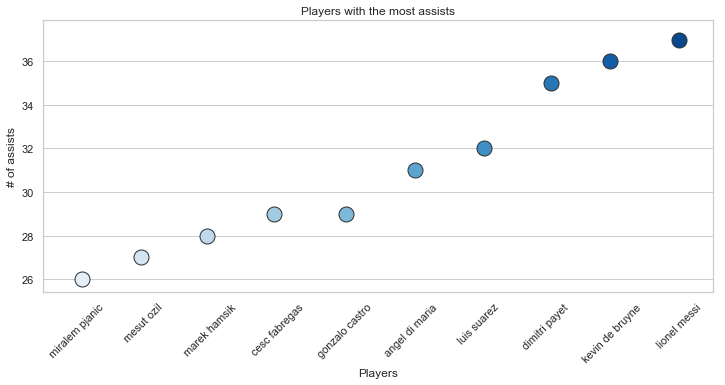

In [50]:
## Setting style
sns.set_style("whitegrid")

## Setting figure
plt.figure(figsize=(12, 5))

## Plotting data
ax = sns.stripplot(top_assists.sort_values('id_event').index, top_assists.sort_values('id_event')['id_event'].values, 
                palette='Blues', size=15, jitter=True,
                linewidth=1)
ax.set(ylabel="# of assists",
       xlabel="Players", title='Players with the most assists');
ax.set_xticklabels(top_assists.sort_values('id_event').index, rotation=45);

# Top Assists
>Premier League: Kevin de Bruyne, Dimitri Payet, Cesc Fabregas, Mesut Ozil
>La Liga: Lionel Messi, Luis Suarez
>Serie A: Marek Hamsik, Miralem Pjanic
>League One: Angel Di Maria
>Bundesliga: Gonzalo Castro

>>La Liga is the only league with 2 players from the same team in the top 10.

### Goals distribution
What are the goals distribution by month in all Europe leagues?

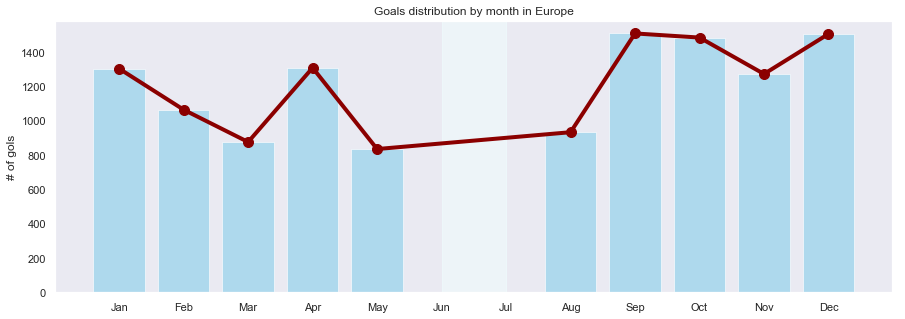

In [51]:
## Copying original dataet
df_events_distribution = df_events.copy()

## Filtering the goals events
df_events_distribution = df_events_distribution[df_events_distribution['is_goal']==1]
## Converting the data column data datetime
df_events_distribution['date'] = pd.to_datetime(df_events_distribution['date'])

## Extracting day, month, and year from provided date and creating a exclusive column for each
df_events_distribution['day'] = df_events_distribution['date'].apply(lambda x: x.day)
df_events_distribution['month'] = df_events_distribution['date'].apply(lambda x: x.month)
df_events_distribution['year'] = df_events_distribution['date'].apply(lambda x: x.year)

## Extracting only months that have events (Some months don't have occorencies beacause of the season break)
sorted_indexes = sorted(df_events_distribution['month'].unique())

## Month labels
months =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## Overall mean by month
total_mean = df_events_distribution.groupby('month').count().mean()['id_event']

## Plotting the results
sns.set_style('dark')
plt.figure(figsize=(15, 5))
plt.bar(sorted_indexes, 
        df_events_distribution.groupby('month').count()['id_event'], alpha=0.6,
       color='skyblue')
plt.plot(sorted_indexes, 
        df_events_distribution.groupby('month').count()['id_event'], color='darkred', marker='o',
        linewidth=4, markersize=10)
plt.axvspan(6, 7, alpha=0.5, color='azure')
plt.xticks([item for item in range(1, 13)], months);
plt.ylabel('# of gols')
plt.title('Goals distribution by month in Europe');

* It seems that **September**, **October** and **December** are very exciting months to watch european football. 
* This data may be explained by the fact that the major leagues are returning from break on August (that's why this month has a low performance), and the clubs seem to need one month to recover and achieve their regular performance.
* Other external factors might impact the overall number of goals, which will be explored in the next section.

### Goals distribution - breakdown by league
What is the breakdown by league? Are all leagues sharing the same pattern?

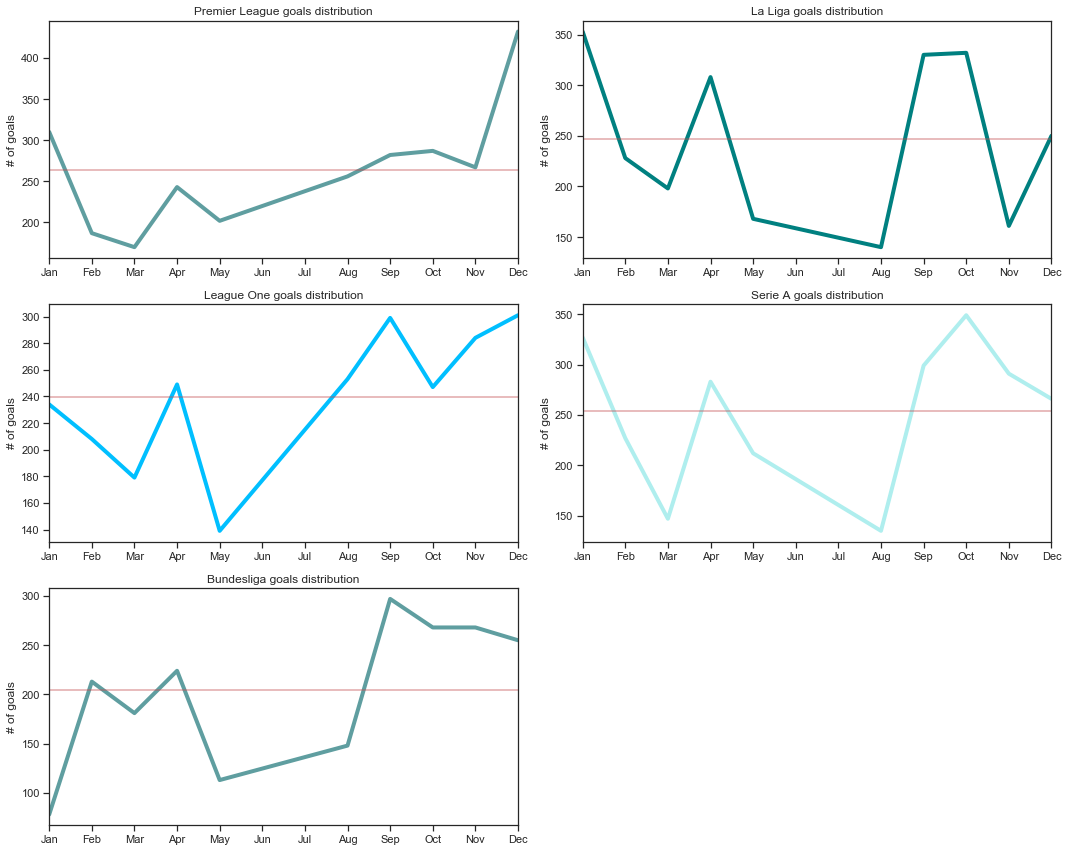

In [52]:
## Goal distribution by each league
premier_league_events = df_events_distribution[df_events_distribution['league'] == 'Premier League']
la_liga_events = df_events_distribution[df_events_distribution['league'] == 'La Liga']
league_one_events = df_events_distribution[df_events_distribution['league'] == 'League One']
serie_a_events = df_events_distribution[df_events_distribution['league'] == 'Serie A']
bundesliga_events = df_events_distribution[df_events_distribution['league'] == 'Bundesliga']

## Mean values for each league
pl_mean = premier_league_events.groupby('month').count().mean()['id_event']
ll_mean = la_liga_events.groupby('month').count().mean()['id_event']
lo_mean = league_one_events.groupby('month').count().mean()['id_event']
sa_mean = serie_a_events.groupby('month').count().mean()['id_event']
bl_mean = bundesliga_events.groupby('month').count().mean()['id_event']

## Random color to use in charts
colors = ['olivedrab', 'seagreen', 'lightseagreen', 'paleturquoise',
'darkcyan', 'deepskyblue', 'royalblue', 'darkslategray',
'cadetblue', 'dodgerblue', 'lightskyblue', 'teal']

## Plotting the distribution by league
sns.set_style('ticks')
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

axs[0][0].plot(premier_league_events.groupby('month').count()['id_event'], lw=4, color=random.choice(colors));
## premier league mean
axs[0][0].axhline(y=pl_mean, color='r', linestyle='-', alpha=0.5)
axs[0][0].set_xlim(1, 12);
axs[0][0].set_xticks([item for item in range(1, 13)])
axs[0][0].set_xticklabels(months);
axs[0][0].set_ylabel('# of goals')
axs[0][0].set_title('Premier League goals distribution')

axs[0][1].plot(la_liga_events.groupby('month').count()['id_event'], lw=4, color=random.choice(colors));
## la liga mean
axs[0][1].axhline(y=ll_mean, color='r', linestyle='-', alpha=0.5)
axs[0][1].set_xlim(1, 12);
axs[0][1].set_xticks([item for item in range(1, 13)])
axs[0][1].set_xticklabels(months);
axs[0][1].set_ylabel('# of goals')
axs[0][1].set_title('La Liga goals distribution')

axs[1][0].plot(league_one_events.groupby('month').count()['id_event'], lw=4, color=random.choice(colors));
## league one mean
axs[1][0].axhline(y=lo_mean, color='r', linestyle='-', alpha=0.5)
axs[1][0].set_xlim(1, 12);
axs[1][0].set_xticks([item for item in range(1, 13)])
axs[1][0].set_xticklabels(months);
axs[1][0].set_ylabel('# of goals')
axs[1][0].set_title('League One goals distribution')

axs[1][1].plot(serie_a_events.groupby('month').count()['id_event'], lw=4, color=random.choice(colors));
## serie a league
axs[1][1].axhline(y=sa_mean, color='r', linestyle='-', alpha=0.5)
axs[1][1].set_xlim(1, 12);
axs[1][1].set_xticks([item for item in range(1, 13)])
axs[1][1].set_xticklabels(months);
axs[1][1].set_ylabel('# of goals')
axs[1][1].set_title('Serie A goals distribution')

axs[2][0].plot(bundesliga_events.groupby('month').count()['id_event'], lw=4, color=random.choice(colors));
## bundesliga mean
axs[2][0].axhline(y=bl_mean, color='r', linestyle='-', alpha=0.5)
axs[2][0].set_xlim(1, 12);
axs[2][0].set_xticks([item for item in range(1, 13)])
axs[2][0].set_xticklabels(months);
axs[2][0].set_ylabel('# of goals')
axs[2][0].set_title('Bundesliga goals distribution')

axs[2][1].axis('off');
plt.tight_layout()

#### Plotting the same data using Plotly visuals
We are plotting the goals distribution by league using plotly linechart. This chart is interesting because of its interactivity. We can check/unckeck variables on-damand. So, for example, if I don't want to see La Liga goals distribution, I might just unmark La Liga and its data will not be drawn.

In [53]:
## Plotly version of the same visual

## Grouping event by month
grouped_monthly_distribution = df_events_distribution.groupby('month').count()

## Excluding months with no events
active_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## Plotting La liga data
la_liga = go.Scatter(
                x=active_months,
                y=la_liga_events.groupby('month').count()['id_event'].values,
                name = "La Liga",
                line = dict(color = '#FF5733'),
                opacity = 0.8)

## Plot Bundesliga data
bundesliga = go.Scatter(
                x=active_months,
                y=bundesliga_events.groupby('month').count()['id_event'].values,
                name = "Bundesliga",
                line = dict(color = '#FFC300'),
                opacity = 0.8)

## Plotting League One data
league_one = go.Scatter(
                x=active_months,
                y=league_one_events.groupby('month').count()['id_event'].values,
                name = "League One",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

## Plotting Serie A data
serie_a = go.Scatter(
                x=active_months,
                y=serie_a_events.groupby('month').count()['id_event'].values,
                name = "Serie A",
                line = dict(color = '#75FF33'),
                opacity = 0.8)

## Plotting Premier League data
premier_league = go.Scatter(
                x=active_months,
                y=premier_league_events.groupby('month').count()['id_event'].values,
                name = "Premier League",
                line = dict(color = '#C70039'),
                opacity = 0.8)

data = [la_liga, bundesliga, league_one, serie_a, premier_league]

layout = dict(
    title = "Goals distribution by month",
     xaxis = dict(
        showticklabels=True)
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Monthly goals distribution in Europe")

### Champions League and Europe League calendars (Other European Competitions)

* It seems that September, October and December are very exciting months to watch european football. 
* It also interesting that on February and March we have a slight drop on the number of goals on the main leagues. That could be caused by a lot of factors, but surprinsgly this is also the month that important european leagues enter their knockout stage: Europe League and Champions League. Due to this, several teams play the domestic league with their alternative players. Other than that, other national competitions take place throughout the year, which might impact in the domestic league overall performance.
* Also, May has a huge drop on goals: this is the last month of the season for most leagues, and most leagues play until mid-May
* La Liga has the most number of goals in 5 out of 10 months.
* Premier League (which is considered a very exciting league) has only the top goals in 2 months. This is fine, taking into account the number of goal does not necessarily imply that a league is more competitive than others.
* Serie A has the other 3 months.
* La Liga has a huge drop in the # of goals in **November**, while Premier League has a huge increase in **December**.

### Events distribution by minutes in matches
Let's analyze when the events happened in the matches.

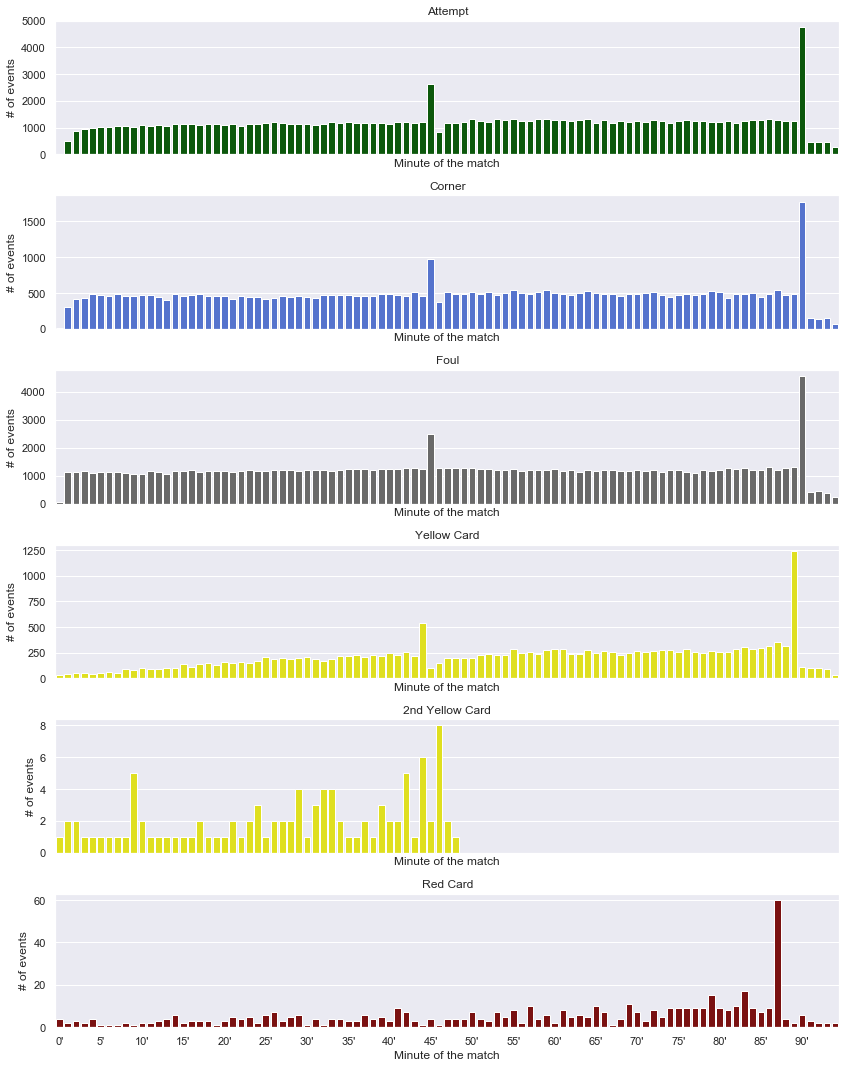

In [56]:
## Copying original data
df_event_type_distribution_minutes = df_events.copy()

## Grouped data function for events distribution in matches
def get_event_type_df(event_type):
    """ Function to return grouped data for a specific event type, passed as parameter
        get_event_type_df(event_type) -> dataframe 
    """
    return df_event_type_distribution_minutes[df_event_type_distribution_minutes['event_type'] == event_type].groupby('time').count()

## Setting dark style
sns.set_style('darkgrid')
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 15), sharex=True)

## Custom colors
colors = ['darkgreen', 'royalblue', 'dimgray', 'yellow', 'yellow', 'darkred']
## Event titles
titles = ['Attempt', 'Corner', 'Foul', 'Yellow Card', '2nd Yellow Card', 'Red Card']

## Plotting events
for item in range(0, 6):
    ax = sns.barplot(x = [j for j in range(0, len(get_event_type_df(item+1)['id_event']))],
                 y=get_event_type_df(item+1)['id_event'].values, color=colors[item], ax=axs[item])
    ax.set_xticks([j for j in range(0, len(get_event_type_df(item+1)['id_event']), 5)])
    ax.set_xticklabels(([(str(i) + "'") for i in range(0, len(get_event_type_df(item+1)['id_event']), 5)]))
    ax.set(xlabel = 'Minute of the match', ylabel = '# of events', title = titles[item]);

plt.tight_layout()

* Attempt, Corner and Fouls have similar distribution to the goals distribution, which makes sense, once these sort of events lead to more goals.
* Red cards are more likely to happen at the minute 87' of the match.
* It's more likely to receive the second yellow card in the first half of the match.


### Goals distribution - Breakdown by season
Minutes when the goals occured in different seasons. Excluding the 2017 season because of the data is not consistent for this year. 

In [58]:
## Goals distribution by year
goals_dist_year = df_events_distribution.groupby(['time', 'season'], as_index=False).count()

## Breaking down by season
season_2015 = goals_dist_year[goals_dist_year['season'] == 2015]
season_2016 = goals_dist_year[goals_dist_year['season'] == 2016]
## The dataset does not contain all the data for the 2017 season. For this reason, we're excluding it 
## to keep the consistency
season_2017 = goals_dist_year[goals_dist_year['season'] == 2017]

## Plotting data

fig = {
    'data': [
        {'x': season_2015['time'].values,
         'y': season_2015['id_event'].values, 'mode': 'markers', 'name': 'Season 2015'},
        {'x': season_2016['time'].values,
         'y': season_2016['id_event'].values, 'mode': 'markers', 'name': 'Season 2016'}        
    ],
    'layout': {
        'xaxis': {'title': 'Minute of the match'},
        'yaxis': {'title': "# of goals"}
    }
}
py.iplot(fig, filename='cufflinks/multiple-scatter')

### Some important information:
* Serie A and La Liga are the top leagues which give yellow cards
* Direct red card is more common than second yellow card in all leagues, which might be an indicator of: Referees are less likely to give the second yellow card , players "take it easy" after receiving the first yellow card, or players are substituted after they receive the second card.

## Summary

* **Lionel Messi** is the second most offensive player, the player with the most assists, and the most decisive player as the player who scored more goals in the last minutes of matches.

* **Cristiano Ronaldo** is the player with the most offensive player, the player with the most goals with Right Foot and Head, and is one the players with the most goals from long range.

* **Barcelona** and **Real Madrid** are: the most offensive teams and the teams which scored the most last minute goals.

* **Barcelona** is the only team with 2 player in the top 10 **most offensive players** and top 10 players with **the most assists.**

* **Luis Suarez** is the second most effective player and the 4th with the most assists.

* **La Liga** is the league with the higher number of months with the most goals: 5.

* **Premier League** is the league with the least number of fouls and the second with the fewer number of yellow cards.

* **Direct red cards** are more likely to happen than **second yellow cards**.

* Other players like **Alexandre Lacazette**, **Christian Eriksen** and **Alexis Sanchez** have great stats too. 

Exploring data for other competitions would draw a better picture of the european football, but domestic leagues can be a good indicator.

Many other questions can be answered with this data, we focused on a few. I've tried to explore different libraries and charts to present the data to make this notebook very diverse. Feel free to make any suggestions.
